In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metrics

In [126]:
def loadPrices(fn):
    global nt, nInst
    df=pd.read_csv(fn, sep='\s+', header=None, index_col=None)
    nt, nInst = df.values.shape
    return (df.values)

pricesFile="./prices.txt"
prcAll = loadPrices(pricesFile)
prcAll = pd.DataFrame(prcAll)
print ("Loaded %d instruments for %d days" % (nInst, nt))

Loaded 100 instruments for 250 days


In [127]:
positions = np.load('./results/positions.npy')

In [128]:
positions

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [-22.,  25.,  14., ...,  47.,  -3.,  -6.],
       [  0.,  26.,  15., ...,   0.,  -4.,  -7.],
       [  1.,  27.,   0., ...,   1.,  -5.,  -8.]])

In [129]:
movingAvg = prcAll.rolling(14).mean()

In [130]:
stockIndex = 1

In [131]:
profit = []

# positions[:,stockIndex]
prices = []

for i, val in enumerate(prcAll[stockIndex]):
    if i > 0:
        currentStockPrice = prcAll[stockIndex][i]
        lastStockPrice = prcAll[stockIndex][i-1]
        currentPosition  = positions[:,stockIndex][i-1]
        lastPosition = positions[:,stockIndex][i-2]

        if currentPosition != lastPosition and i > 1:
            if currentPosition == 0:
                avgEntryPrice = sum(prices) / len(prices)
                differenceInPrice = avgEntryPrice - currentStockPrice

                # or is it lastPosition * differenceInPrice i dont fucking know
                gain = -lastPosition * differenceInPrice
                if lastPosition < 0:
                    profit.append(profit[-1] + gain)
                else:
                    profit.append(profit[-1] - gain)

                # print("--------------------------")
                # print(avgEntryPrice)
                # print(differenceInPrice)
                # print(lastPosition)
                # print(profit[-2], profit[-1])

            else:
                prices.append(lastStockPrice)
                profit.append(profit[-1])
        else:
            profit.append(profit[-1])
    else:
        profit.append(0)

--------------------------
4.92
0.040000000000000036
-1.0
0 0.040000000000000036
--------------------------
4.803
0.022999999999999687
19.0
0.040000000000000036 0.4769999999999941
--------------------------
4.801904761904762
0.031904761904762324
-1.0
0.4769999999999941 0.5089047619047564
--------------------------
4.800454545454546
0.030454545454546178
-1.0
0.5089047619047564 0.5393593073593026
--------------------------
4.804516129032258
0.044516129032258434
-9.0
0.5393593073593026 0.9400044686496285
--------------------------
4.776444444444443
0.0364444444444425
14.0
0.9400044686496285 1.4502266908718235
--------------------------
4.77576923076923
0.09576923076923016
-7.0
1.4502266908718235 2.1206113062564347
--------------------------
4.755873015873016
0.0858730158730161
11.0
2.1206113062564347 3.065214480859612
--------------------------
4.75453125
0.12453125000000043
-1.0
3.065214480859612 3.189745730859612
--------------------------
4.68659090909091
0.1965909090909097
24.0
3.1897

In [132]:
print(len(profit))

250


21.566359967004207
27.0


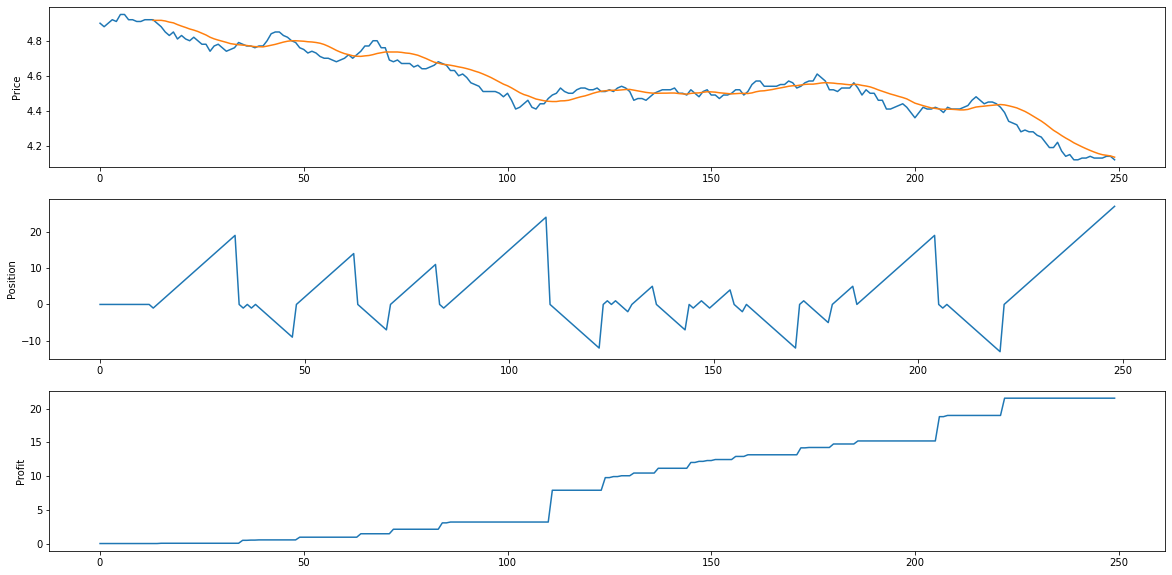

In [133]:
fig, ax = plt.subplots(3, 1, figsize = (20, 10))
ax[0].plot(prcAll[stockIndex])
ax[0].plot(movingAvg[stockIndex])
ax[0].set_ylabel("Price")
ax[1].plot(positions[:,stockIndex])
ax[1].set_ylabel("Position")
ax[2].plot(profit)
ax[2].set_ylabel("Profit")


print(profit[-1])
print(positions[:,stockIndex][-1])